In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

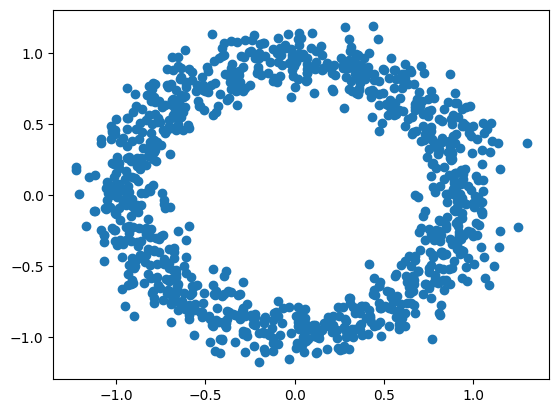

In [ ]:
X,y= make_circles(n_samples=1000, factor=0.9,noise=0.1,random_state=0)
plt.scatter(X[:,0],X[:,1])

In [ ]:
X=X.T
X.shape

(2, 1000)

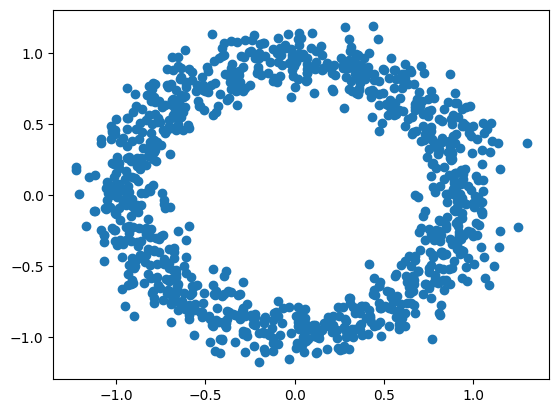

In [ ]:
d,n=X.shape
plt.scatter(X[0],X[1]);

In [ ]:
K=(X.T@X+1)**2
K.shape

(1000, 1000)

In [ ]:
(((K**2).sum())**0.5)/n

1.9673527586941375

In [ ]:
def kernel_gaussian(x,y,sigma=1):
    return np.exp(-np.linalg.norm(x-y)**2/(2*sigma**2))

new_k=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    new_k[i,j]=kernel_gaussian(X[:,i],X[:,j],2)

In [ ]:
(((new_k**2).sum())**0.5)/n

0.8155313607905466

In [ ]:
one=np.ones((n,n))/n

In [47]:
KC=K-one@K-K@one+one@K@one
(((KC**2).sum())**0.5)/n

1.346231525525935

In [ ]:
eigval,eigvec=np.linalg.eigh(KC)

(1000,)

In [ ]:
w1=eigvec[:,-1]
w2=eigvec[:,-2]

lamb1=eigval[-1]
lamb2=eigval[-2]

In [49]:
trans_vec1= w1/ np.sqrt(lamb1)
trans_vec2= w2/ np.sqrt(lamb2)
KC.shape,trans_vec1.shape

((1000, 1000), (1000,))

In [51]:
alphas=KC@trans_vec1
betas=KC@trans_vec2

1.565526834397767


In [ ]:
(np.abs(alphas)+np.abs(betas)).sum()/n

1.7165097095084603